In [ ]:
!git clone https://github.com/Danhui-Yang/MicroMechanicsUMAPClustering.git

Cloning into 'MicroMechanicsUMAPClustering'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 96 (delta 44), reused 19 (delta 5), pack-reused 6
Unpacking objects: 100% (96/96), done.


In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 1.1 MB/s 
     |████████████████████████████████| 1.1 MB 24.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=1c0c0a3b8594f6f8a70102ac9404d8867d81c916e9b4f8903195a22a0dbcd305
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=76e38bd0b611b0c1e1992fe47cb53a94e4100f2e99e451713b28300efd06ae7e
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [ ]:
import os
os.chdir("/content/MicroMechanicsUMAPClustering/MMUC/")


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from mmuc import *

In [ ]:
# number of PCA dimension (you can change to the number that suits you)
nPCA = 6 

# number of the Cluster (you can change to the number that suits you)
nCluster = 20

In [ ]:
# data path, you can use your data file but the title on first row should be the same!!
DATASET = "../data/data_Kmatrix.csv"

In [ ]:
# loading data
data = load_data(DATASET, index_col_name="Number")
org_cols = data.columns
org_cols

Index(['K11', 'K12', 'K13', 'K14', 'K15', 'K16', 'K21', 'K22', 'K23', 'K24',
       'K25', 'K26', 'K31', 'K32', 'K33', 'K34', 'K35', 'K36', 'K41', 'K42',
       'K43', 'K44', 'K45', 'K46', 'K51', 'K52', 'K53', 'K54', 'K55', 'K56',
       'K61', 'K62', 'K63', 'K64', 'K65', 'K66', 'vol'],
      dtype='object')

In [ ]:
data

,K11,K12,K13,K14,K15,K16,K21,K22,K23,K24,...,K54,K55,K56,K61,K62,K63,K64,K65,K66,vol
Number,,,,,,,,,,,,,,,,,,,,,
1,6463.747990,2927.495979,2927.495979,680.769598,0,0,2927.495979,7121.780348,4588.203568,1361.539197,...,0,2762.607506,465.927541,0,0,0,0,465.927541,2762.607506,0.000153
2,6555.547531,3102.456514,3119.733610,110.948718,0,0,3141.573873,7493.576452,5072.719041,345.534039,...,0,2953.509252,69.242551,0,0,0,0,23.147600,3138.385181,0.000153
3,6552.273206,3091.928590,3117.164232,29.881147,0,0,3113.710266,7453.077215,5001.763850,133.879879,...,0,3001.711018,20.625902,0,0,0,0,19.907554,3048.517008,0.000153
4,6551.597758,3081.217873,3125.173159,14.170184,0,0,3098.683414,7423.956590,4970.777066,56.133137,...,0,3032.287364,14.849706,0,0,0,0,14.111479,3013.041401,0.000153
5,6551.427918,3067.492780,3138.218894,9.949340,0,0,3086.962015,7403.427417,4944.420644,36.208156,...,0,3060.162034,14.418921,0,0,0,0,14.330698,2983.772774,0.000153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6396,6551.427918,3067.492780,3138.218894,9.949340,0,0,3086.962015,7403.427417,4944.420644,36.208156,...,0,3060.162034,14.418921,0,0,0,0,14.330698,2983.772774,0.000153
6397,6551.597758,3081.217873,3125.173159,14.170184,0,0,3098.683414,7423.956590,4970.777066,56.133137,...,0,3032.287364,14.849706,0,0,0,0,14.111479,3013.041401,0.000153
6398,6552.273206,3091.928590,3117.164232,29.881147,0,0,3113.710266,7453.077215,5001.763850,133.879879,...,0,3001.711018,20.625902,0,0,0,0,19.907554,3048.517008,0.000153


In [ ]:
#prepro data
data_prepro, cols, vol = prepro_data(data, drop = True, isCenter = False)

In [ ]:
data_prepro

,K11,K12,K13,K14,K21,K22,K23,K24,K31,K32,K33,K34,K41,K42,K43,K44,K55,K56,K65,K66
Number,,,,,,,,,,,,,,,,,,,,
1,6463.747990,2927.495979,2927.495979,680.769598,2927.495979,7121.780348,4588.203568,1361.539197,2927.495979,4588.203568,7121.780348,1361.539197,256.906816,513.813633,513.813633,3453.900497,2762.607506,465.927541,465.927541,2762.607506
2,6555.547531,3102.456514,3119.733610,110.948718,3141.573873,7493.576452,5072.719041,345.534039,3080.616251,4916.249605,7406.215401,98.260834,18.618501,18.539533,55.934471,4225.412320,2953.509252,69.242551,23.147600,3138.385181
3,6552.273206,3091.928590,3117.164232,29.881147,3113.710266,7453.077215,5001.763850,133.879879,3095.382556,4914.637145,7466.893079,-14.355291,9.245181,21.959779,15.020946,4141.507174,3001.711018,20.625902,19.907554,3048.517008
4,6551.597758,3081.217873,3125.173159,14.170184,3098.683414,7423.956590,4970.777066,56.133137,3107.707618,4900.914903,7529.915571,0.547600,5.781671,7.160846,15.965838,4155.314866,3032.287364,14.849706,14.111479,3013.041401
5,6551.427918,3067.492780,3138.218894,9.949340,3086.962015,7403.427417,4944.420644,36.208156,3118.749658,4866.543703,7608.454931,3.589206,5.939728,13.368326,10.390585,4151.178061,3060.162034,14.418921,14.330698,2983.772774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6396,6551.427918,3067.492780,3138.218894,9.949340,3086.962015,7403.427417,4944.420644,36.208156,3118.749658,4866.543703,7608.454931,3.589206,5.939728,13.368326,10.390585,4151.178061,3060.162034,14.418921,14.330698,2983.772774
6397,6551.597758,3081.217873,3125.173159,14.170184,3098.683414,7423.956590,4970.777066,56.133137,3107.707618,4900.914903,7529.915571,0.547600,5.781671,7.160846,15.965838,4155.314866,3032.287364,14.849706,14.111479,3013.041401
6398,6552.273206,3091.928590,3117.164232,29.881147,3113.710266,7453.077215,5001.763850,133.879879,3095.382556,4914.637145,7466.893079,-14.355291,9.245181,21.959779,15.020946,4141.507174,3001.711018,20.625902,19.907554,3048.517008


In [ ]:
# appyling linear dim reduction PCA
matPCA = get_pca(data_prepro, dim=nPCA)


(6400, 6)


In [ ]:
# applying non-linear dim reduction UMAP (might take a few minute)
matEmbed = get_umap(matPCA)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(6400, 2)


In [ ]:
cluster_id, min_dist, kmap = get_cluster(matEmbed, nCluster)
data[f'C{nCluster}'] = cluster_id
data[f'M{nCluster}'] = min_dist
data['vol'] = vol

In [ ]:
grouped = data.groupby([f'C{nCluster}'])
cid = grouped[f'M{nCluster}'].idxmin().values
cMat = data.iloc[cid][org_cols]
print('center Id:', cid)
data['t1'] = matEmbed[:,0]
data['t2'] = matEmbed[:,1]    

center Id: [2969 2665 5657 5532 5956 4790 1958 6274 4108 4411  735 5546 2980 3646
  314  110  739 2088 1665 2401]


In [ ]:
cluster_vol = grouped['vol'].sum().values
print('check cluster volumn sum == 1:', cluster_vol.sum().round(3)) 
cMat['vol'] = cluster_vol

check cluster volumn sum == 1: 1.0


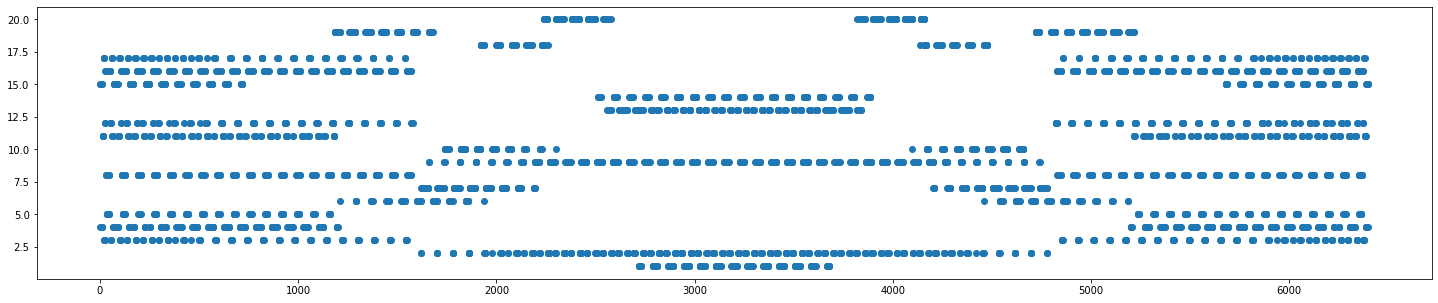

In [ ]:
plt.figure(figsize=(25,5))
plt.scatter(list(range(data.shape[0])), data[f'C{kmap.n_clusters}'])

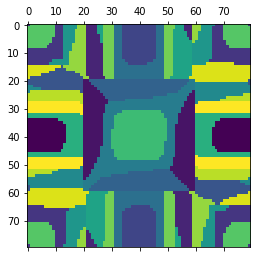

In [ ]:
color = data[f'C{kmap.n_clusters}'].values
plt.matshow(color.reshape((80,80)))

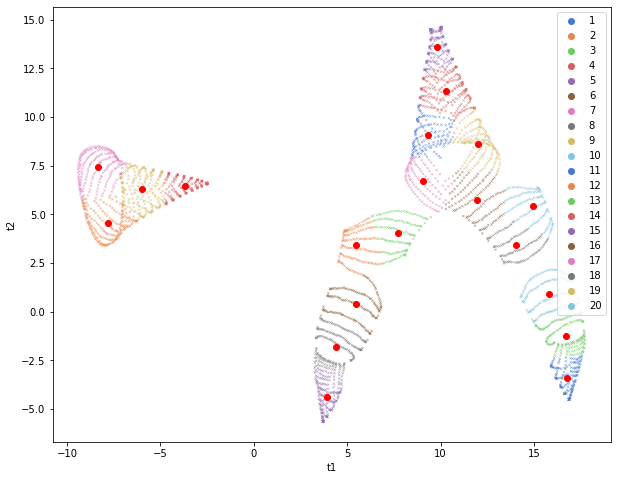

In [ ]:
plot_umap(data, kmap)

In [ ]:
outDir = "../out/"

In [ ]:
save_cluster_ids(data, nCluster, outDir=outDir, name='kMat')

Cluster1 of len320: [2721, 2722, 2723]..
Cluster2 of len424: [1621, 1622, 1701]..
Cluster3 of len247: [22, 23, 24]..
Cluster4 of len442: [1, 11, 12]..
Cluster5 of len346: [35, 36, 37]..
Cluster6 of len248: [1213, 1291, 1292]..
Cluster7 of len411: [1623, 1624, 1625]..
Cluster8 of len374: [32, 33, 34]..
Cluster9 of len435: [1659, 1660, 1738]..
Cluster10 of len249: [1741, 1742, 1743]..
Cluster11 of len289: [14, 15, 16]..
Cluster12 of len269: [26, 27, 54]..
Cluster13 of len318: [2561, 2562, 2563]..
Cluster14 of len330: [2515, 2516, 2517]..
Cluster15 of len334: [2, 3, 4]..
Cluster16 of len280: [28, 29, 30]..
Cluster17 of len220: [19, 20, 21]..
Cluster18 of len204: [1922, 1923, 1924]..
Cluster19 of len342: [1185, 1186, 1187]..
Cluster20 of len318: [2241, 2242, 2243]..


In [ ]:
save_centers(cMat,nCluster,outDir=None,name='cMat')

In [ ]:
cMat

,K11,K12,K13,K14,K15,K16,K21,K22,K23,K24,...,K54,K55,K56,K61,K62,K63,K64,K65,K66,vol
Number,,,,,,,,,,,,,,,,,,,,,
2970,6654.023282,5125.487477,1490.605651,57.958612,0,0,4733.277977,17397.331960,1535.779945,-3.359269,...,0,770.303522,196.153040,0,0,0,0,114.741978,5923.619422,0.029535
2666,89315.602480,4962.474594,4299.935316,-187.158051,0,0,4791.417460,16290.044710,2875.625132,-447.106714,...,0,5601.929002,-326.347361,0,0,0,0,-307.731735,6268.293364,0.094717
5658,6559.190515,2333.912499,3902.849561,381.769211,0,0,2542.920541,6644.061926,3527.620236,972.954402,...,0,4224.706562,804.231423,0,0,0,0,1007.485864,1869.829590,0.032639
5533,6544.538679,3006.704945,3171.449773,-298.391337,0,0,3034.606078,8061.049946,4077.374367,-602.874817,...,0,3123.476353,-678.829971,0,0,0,0,-694.890163,2875.998079,0.067790
5957,6642.856370,1575.300043,4996.125437,-45.597550,0,0,1926.098347,4878.056242,2826.337146,-169.469707,...,0,5748.647542,-90.747104,0,0,0,0,-149.923980,875.139337,0.031945
4791,6550.343337,3708.343364,2493.029986,401.439780,0,0,3540.478691,11239.300180,2922.614585,651.013352,...,0,2099.439884,1022.997883,0,0,0,0,859.370045,3938.046982,0.036215
1959,89319.937210,4152.818906,5126.929929,-47.987001,0,0,4402.767592,13964.434770,3646.635593,-70.895986,...,0,6434.750587,-77.904549,0,0,0,0,-84.783303,5454.972257,0.093549
6275,6632.386804,1660.489883,4869.057333,-19.303535,0,0,1991.887112,5169.416525,2798.131923,-66.614303,...,0,5575.125377,-38.632091,0,0,0,0,-61.727766,982.875675,0.035971
4109,89311.598830,4623.197654,4623.197654,251.757987,0,0,4623.197654,15200.827780,3291.962837,503.515975,...,0,5926.274593,427.121053,0,0,0,0,427.121053,5926.274593,0.111060


In [ ]:
sum(cMat["vol"])

0.9999924239999999